In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mpl_lego.colors as colors

from noise_correlations.utils import angle2R
from mpl_lego.ellipse import plot_cov_ellipse

%matplotlib inline

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

In [3]:
ccycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Figure 1a-c

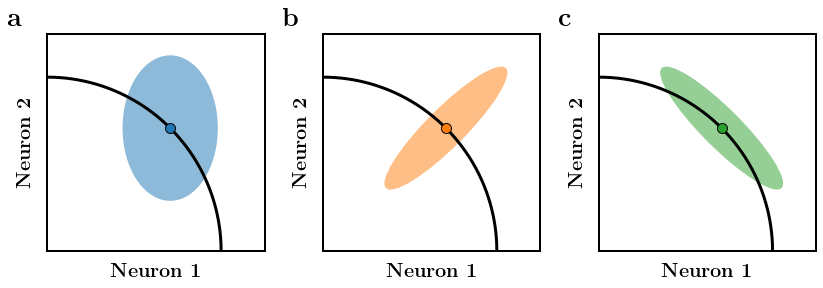

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

n1 = np.linspace(0, 1, 1000)
n2 = np.sqrt(1 - n1**2)

# Plot mean response curves
for ax in axes:
    ax.plot(n1, n2,
            color='black',
            linewidth=3)

center = 1 / np.sqrt([2, 2])

# Plot private variance ellipse
privax = axes[0]
private = np.array([[0.3, 0.],
                    [0., 0.7]])
plot_cov_ellipse(private,
                 mu=center,
                 ax=privax,
                 facecolor=colors.hex_to_rgb(ccycle[0], 0.5),
                 include_mu=False)
privax.scatter(center[0],
               center[1],
               color=ccycle[0],
               edgecolor='black',
               s=100,
               zorder=1000)

# Plot shared variability ellipse
shareax = axes[1]
shared = np.array([[0.5, 0.45],
                   [0.45, 0.5]])
plot_cov_ellipse(shared,
                 mu=center,
                 ax=shareax,
                 facecolor=colors.hex_to_rgb(ccycle[1], 0.5),
                 include_mu=False)
shareax.scatter(center[0],
                center[1],
                color=ccycle[1],
                edgecolor='black',
                s=100,
                zorder=1000)

# Plot differential correlation ellipse
diffax = axes[2]
diff = np.array([[0.5, -0.45],
                 [-0.45, 0.5]])
plot_cov_ellipse(diff,
                 mu=center,
                 ax=diffax,
                 facecolor=colors.hex_to_rgb(ccycle[2], 0.5),
                 include_mu=False)
diffax.scatter(center[0],
               center[1],
               color=ccycle[2],
               edgecolor='black',
               s=100,
               zorder=1000)


for ax in axes:
    ax.set_xlim([0, 1.25])
    ax.set_ylim([0, 1.25])

    # Set spine thickness of axes
    for spine in ax.spines:
        ax.spines[spine].set_linewidth(2)
        
    # Axes labels
    ax.set_xlabel(r'\textbf{Neuron 1}',
                  fontsize=20,
                  labelpad=12)
    ax.set_ylabel(r'\textbf{Neuron 2}',
                  fontsize=20,
                  labelpad=12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

for ax, label in zip([privax, shareax, diffax],
                     [r'\textbf{a}', r'\textbf{b}', r'\textbf{c}']):
    ax.text(x=-0.15,
            y=1.07,
            s=label,
            ha='center',
            va='center',
            size=27,
            fontfamily='sans-serif',
            transform=ax.transAxes)

# plt.savefig('figure1a-c.pdf', bbox_inches='tight')

# Figure 1d-e

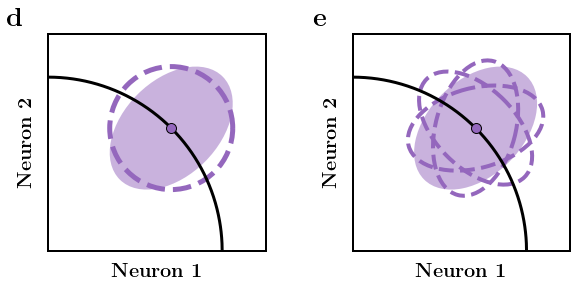

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

n1 = np.linspace(0, 1, 1000)
n2 = np.sqrt(1 - n1**2)

base = np.array([[1., 0.5],
                 [0.5, 1.0]])
center = 1 / np.sqrt([2, 2])

# Plot mean response curves
for ax in axes:
    ax.plot(n1, n2,
            color='black',
            linewidth=3)
    plot_cov_ellipse(shared,
                     mu=center,
                     ax=ax,
                     facecolor=colors.hex_to_rgb(ccycle[4], 0.5),
                     include_mu=False)
    ax.scatter(center[0],
               center[1],
               color=ccycle[4],
               edgecolor='black',
               s=100,
               zorder=1000)
    
# Plot shuffle null model
shuffleax = axes[0]
shuffle = np.array([[0.5, 0.],
                    [0., 0.5]])
plot_cov_ellipse(shuffle,
                 mu=center,
                 ax=shuffleax,
                 facecolor=colors.hex_to_rgb(ccycle[4], 0.0),
                 edgecolor=colors.hex_to_rgb(ccycle[4], 1.0),
                 scale=1.,
                 linewidth=5,
                 linestyle='--',
                 include_mu=False)

# Plot rotation null model
rotax = axes[1]
angle1 = 30
angle2 = -30
angle3 = 90
R1 = angle2R(angle1)
R2 = angle2R(angle2)
R3 = angle2R(angle3)

rot1 = R1 @ base @ R1.T
rot2 = R2 @ base @ R2.T
rot3 = R3 @ base @ R3.T


for rot in [rot1, rot2, rot3]:
    plot_cov_ellipse(rot,
                     mu=center,
                     ax=rotax,
                     facecolor=colors.hex_to_rgb(ccycle[4], 0.0),
                     edgecolor=colors.hex_to_rgb(ccycle[4], 1.0),
                     scale=0.65,
                     linewidth=4,
                     linestyle='--',
                     include_mu=False)

    
for ax in axes:
    ax.set_xlim([0, 1.25])
    ax.set_ylim([0, 1.25])

    # Set spine thickness of axes
    for spine in ax.spines:
        ax.spines[spine].set_linewidth(2)
        
    # Axes labels
    ax.set_xlabel(r'\textbf{Neuron 1}',
                  fontsize=20,
                  labelpad=12)
    ax.set_ylabel(r'\textbf{Neuron 2}',
                  fontsize=20,
                  labelpad=12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    

for ax, label in zip([shuffleax, rotax],
                     [r'\textbf{d}', r'\textbf{e}']):
    ax.text(x=-0.15,
            y=1.07,
            s=label,
            ha='center',
            va='center',
            size=27,
            fontfamily='sans-serif',
            transform=ax.transAxes)

# plt.savefig('figure1d-e.pdf', bbox_inches='tight')